In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from numpy.linalg import norm

from random import seed
from random import randint
from sklearn.metrics import accuracy_score

pd.option_context('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also
    
seed(1)

np.set_printoptions(precision=10, )
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)
%precision 10
!cp -r /content/drive/MyDrive/CS_480_680_DataSets /content

''' 
Dataset for K-nearest neighbour: knn-dataset.zip
Problem: this data is a modified version of the Optical Recognition of Handwritten Digits Dataset from the UCI repository. 
It contains pre-processed black and white images of the digits 5 and 6. 
Each attribute indicates how many pixels are black in a patch of 4 x 4 pixels.
Format: there is one row per image and one column per attribute. The class labels are 5 and 6.
The training set is already divided into 10 subsets for 10-fold cross validation.

http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Data Set Information:

We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. 
From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 
32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. 
This generates an input matrix of 8x8 where each element is an integer in the range 0..16. 
This reduces dimensionality and gives invariance to small distortions.

To sum up:
Each attribute indicates how many pixels are black in a patch of 4 x 4 pixels.
Input matrix of 8x8 where each element is an integer in the range 0..16. 

'''

' \nDataset for K-nearest neighbour: knn-dataset.zip\nProblem: this data is a modified version of the Optical Recognition of Handwritten Digits Dataset from the UCI repository. \nIt contains pre-processed black and white images of the digits 5 and 6. \nEach attribute indicates how many pixels are black in a patch of 4 x 4 pixels.\nFormat: there is one row per image and one column per attribute. The class labels are 5 and 6.\nThe training set is already divided into 10 subsets for 10-fold cross validation.\n\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nData Set Information:\n\nWe used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. \nFrom a total of 43 people, 30 contributed to the training set and different 13 to the test set. \n32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. \nThis generates an input matrix

In [3]:
# train.csv dataSet
train_1 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData1.csv', header=None)
train_2 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData2.csv', header=None)
train_3 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData3.csv', header=None)
train_4 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData4.csv', header=None)
train_5 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData5.csv', header=None)
train_6 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData6.csv', header=None)
train_7 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData7.csv', header=None)
train_8 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData8.csv', header=None)
train_9 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData9.csv', header=None)
train_10 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainData10.csv', header=None)
test_data = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/testData.csv', header=None)

# Labels dataSet
labels_1 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels1.csv', header=None)
labels_2 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels2.csv', header=None)
labels_3 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels3.csv', header=None)
labels_4 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels4.csv', header=None)
labels_5 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels5.csv', header=None)
labels_6 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels6.csv', header=None)
labels_7 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels7.csv', header=None)
labels_8 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels8.csv', header=None)
labels_9 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels9.csv', header=None)
labels_10 = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/trainLabels10.csv', header=None)
test_labels = pd.read_csv('/content/CS_480_680_DataSets/knn_dataset/testLabels.csv', header=None)

# Replace classes {'5' -> -1 and '6' -> 1}
replace_labels = {5: 0, 6: 1}
rename_features = {0: 'Label'}

labels_1.replace(replace_labels, inplace=True)
labels_2.replace(replace_labels, inplace=True)
labels_3.replace(replace_labels, inplace=True)
labels_4.replace(replace_labels, inplace=True)
labels_5.replace(replace_labels, inplace=True)
labels_6.replace(replace_labels, inplace=True)
labels_7.replace(replace_labels, inplace=True)
labels_8.replace(replace_labels, inplace=True)
labels_9.replace(replace_labels, inplace=True)
labels_10.replace(replace_labels, inplace=True)
test_labels.replace(replace_labels, inplace=True)

labels_1.rename(columns=rename_features, inplace=True)
labels_2.rename(columns=rename_features, inplace=True)
labels_3.rename(columns=rename_features, inplace=True)
labels_4.rename(columns=rename_features, inplace=True)
labels_5.rename(columns=rename_features, inplace=True)
labels_6.rename(columns=rename_features, inplace=True)
labels_7.rename(columns=rename_features, inplace=True)
labels_8.rename(columns=rename_features, inplace=True)
labels_9.rename(columns=rename_features, inplace=True)
labels_10.rename(columns=rename_features, inplace=True)
test_labels.rename(columns=rename_features, inplace=True)

In [4]:
train_set = [train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8, train_9, train_10]
labels_set = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_7, labels_8, labels_9, labels_10]

In [5]:
# Number of trainingdata splits
k_cross = 10

# List of dataFrames of the training data execluding the training data used for validation 
training_data = []
training_labels = []

# Same for validation data
validation_data = []
validation_labels = []

# Get training data and validation data as list of dataFrames
for i in range(k_cross):
  sub_train = [train_set[index] for index in range(k_cross) if index != i]
  sub_label = [labels_set[index] for index in range(k_cross) if index != i]
  
  # Concatenate all dataframes in the sub_train list to a single dataframe in order
  # to get a single training examples dataFrame with all examples in it.
  training_data.append(pd.concat(sub_train, ignore_index=True))
  training_labels.append(pd.concat(sub_label, ignore_index=True))

  validation_data.append(train_set[i])
  validation_labels.append(labels_set[i])

In [6]:
def GET_examples_by_labels(df_data, df_labels, value):
  ''' This function gets sub set of examples that follow a certain label value.
      i.e. for a label; it takes binary values either 0 or 1.
      for a certain label value i.e. 0, get all the examples corresponding
      to this label value.
      Return: D_examples -> this is a sub dataset that contains all the examples
      corresponding to a single label value from the labels.
  '''
  
  # Get all the labels from the dataframe
  labels = df_labels['Label'].tolist()

  # find the location of 'value' in the feature values
  example_indices  = np.where(np.array(labels) == value)[0]

  # Return a DataFrame of all examples with labels are = value
  return df_data.iloc[example_indices].reset_index(drop=True)

def mean_calc(data):
  '''
  The function is a helper for the MLE parameter estimation
  For 900 examples each has 64 features, the function returns 
  64 x 1 array for the mean of all exmples
  '''
  # Return array of means i.e. 64 means, all normalized by number of examples i.e. 900
  # shape of mean is M x 1
  return (np.array(data.sum(axis=0)) / data.shape[0]).reshape(data.shape[1], 1)

In [7]:
def GM_MLE_Parameter_Estimation(data_df, Labels_df):
  '''
  This function calculates the likelihood maximization paramters for gaussion
  mixtures for 2 classes classification. 

  The parameters calculate and returend are:
  covariance_mat: It's the return of the following expression ..
                  Sigma = N1/N * S1 + N2/N * s2
                  S1 = 1/N1 * sum((x_n - u_1)*(x_n - u_1).T)
                  S2 = 1/N2 * sum((x_n - u_2)*(x_n - u_2).T)
                  Total expression:
    Sigma = 1/N * sum((x_n - u_1)*(x_n - u_1).T) + 1/N * sum((x_n - u_2)*(x_n - u_2).T)

  mean_1: It's the empirical mean; mean of all input vectors assigned 
          to the class 1, and has the following equation:
          mue_1 = sum(x_n) / N1
  
  mean_2: It's the empirical mean; mean of all input vectors assigned 
          to the class 2, and has the following equation:
          mue_2 = sum(x_n) / N2

  Note: sum() in the expressions has the range of all the examples 

  '''
  # Get sub datasets where labels are equal to zeros and ones
  Xs_Labeled_0 = GET_examples_by_labels(data_df, Labels_df, 0)
  Xs_Labeled_1 = GET_examples_by_labels(data_df, Labels_df, 1)

  # Get prior probability class 1 and class 0
  p_c_1 = Xs_Labeled_0.shape[0] / data_df.shape[0]
  p_c_2 = Xs_Labeled_1.shape[0] / data_df.shape[0]

  # Get mean values, mean is M x 1 column vector
  mue_1 = mean_calc(Xs_Labeled_0)
  mue_2 = mean_calc(Xs_Labeled_1)

  # Get S1 and S2
  s1 = 0
  s2 = 0

  # s1 and s2 are M x M matrices where M is number of features in dataset
  for index, row_example in Xs_Labeled_0.iterrows():
    # Make sure that the 2 arrays are of same shape, otherwise casting might occur
    tmp = np.array(row_example).reshape(data_df.shape[1], 1) - mue_1
    s1 += np.dot(tmp, tmp.T)
  
  for index, row_example in Xs_Labeled_1.iterrows():
    tmp = np.array(row_example).reshape(data_df.shape[1], 1) - mue_2
    s2 += np.dot(tmp, tmp.T)

  # Normalize all and sum both components
  first_covar_term = s1/data_df.shape[0]
  sec_covar_term = s2/data_df.shape[0]

  #Calculate covariance matrix sigma and its inverse
  covar_matrix = first_covar_term + sec_covar_term
  covar_matrix_inv = np.linalg.inv(covar_matrix)
  
  return p_c_1, p_c_2, mue_1, mue_2, covar_matrix, covar_matrix_inv

In [8]:
def sigmoid(w, x, wo):
  return 1 / (1 + np.exp(-1 * np.dot(w.T, x) + wo))

def calculate_weight( pc1, pc2, mean1, mean2, covar, covar_inv):
  ''' 
  This function computes W vector and Wo scalar value according to
  the following equations:
  Probability of class C = pi -> true probability is for labels = 1
  W = Covar_inverse * (mue_1 - mue_2)
  W = - 0.5 * mue_1.T * Covar_inverse * mue_1 + 
      0.5 * meu_2.T * Covar_inverse * mue_2 + 
      ln( P(C=0) / P(C=1))

  '''
  W = np.dot(covar_inv, (mean1 - mean2))
  Wo = - 0.5 * np.dot(np.dot(mean1.T, covar_inv), mean1) + 0.5 * np.dot(np.dot(mean2.T, covar_inv), mean2) + np.log10(pc1 / pc2)
  
  return W, Wo  

def predict_GMix(test_df, w, w0):
  y_pred = []
  for index, row_example in test_df.iterrows():
    # Make sure that the 2 arrays are of same shape, otherwise casting might occur
    y_pred.append(sigmoid(w, np.array(row_example).reshape(test_df.shape[1], 1), w0))
  return y_pred


In [13]:
# API for Gaussian mixture
def GM_API(tr_data, tr_labels, test_data, test_labels):
  '''
  Call this function for training and classifying your train
  and test data
  '''
  # Get Likelihood estimated parameters for gaussian mixtures model
  param = GM_MLE_Parameter_Estimation(tr_data, tr_labels)

  # Get trained features and bias term
  w, w0 = calculate_weight(param[0], param[1], param[2], param[3], param[4], param[5])

  # Get the predictions using sigmoid activation function for test data
  y_pred = np.array(predict_GMix(test_data, w, w0))

  # Decision boundary theorem where prob >= 0.5 is class 0
  zeros_class_indeces = y_pred >= 0.5 
  ones_class_indeces = y_pred < 0.5 
  y_pred[zeros_class_indeces] = 0
  y_pred[ones_class_indeces] = 1

  fig = plt .figure(figsize=(15, 5))
  plt.rcParams.update({'font.size': 12})
  plt.ylabel('Labels')
  plt.xlabel('Examples')
  plt.title('Gaussian Mixture predictions vs true labels data')

  plt.scatter(np.arange(110), test_labels, marker= "x", s = 1000)
  plt.scatter(np.arange(110), np.squeeze(y_pred), marker= "x", s = 1000)
  plt.show()

  # Print the accuracy for the test data
  print("Testing data accuracy: ", accuracy_score(np.array(test_labels), np.array(np.squeeze(y_pred))) * 100, "%")


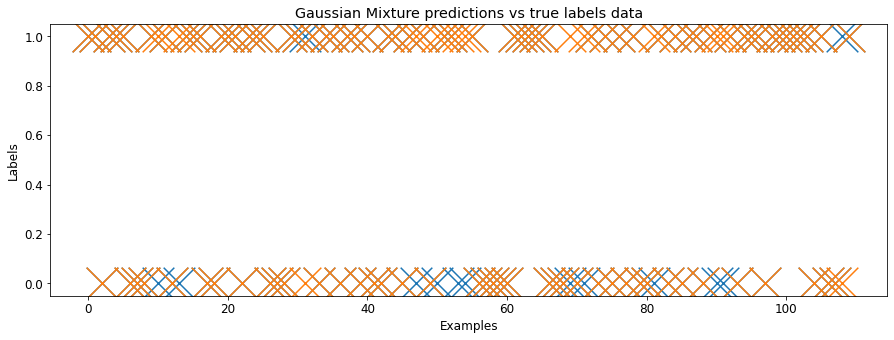

Testing data accuracy:  88.18181818181819 %


In [14]:
# training and testing data in the code
tot_train_data = pd.concat([training_data[0], validation_data[0]], ignore_index=True)
tot_train_labels = pd.concat([training_labels[0], validation_labels[0]], ignore_index=True)

GM_API(tot_train_data, tot_train_labels, test_data, test_labels)